In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
# plt.rc('font', family='Gothic') 			## 이 두 줄을 
# plt.rcParams['axes.unicode_minus'] = False  ## 추가해줍니다. 

path = "../LASER/B-1/"
filename = lambda x: path + "B-1_DoubleSlit_" + str(x) + ".csv"
POSITION_COL = "detector_position(mm)"
VOLTAGE_COL = "voltage(V)"

def get_data(x, trimmed = False):
  data = pd.read_csv(filename(x))
  if trimmed:
    data = data[data[POSITION_COL] < 8]
  pos = data[POSITION_COL]
  volt = data[VOLTAGE_COL]
  return pos, volt

def plot_data(x):
  pos, volt = get_data(x)
  # plt.plot(pos, volt, color='red', linestyle='solid', marker='o', mfc='black', mec='black', ms=3)
  plt.scatter(pos, volt, color='black', s=4)
  plt.xlabel("Detecor Position (mm)")
  plt.ylabel("Output Voltage (V)")
  plt.title(f"Detecor Position vs Output Voltage({str(x)})")

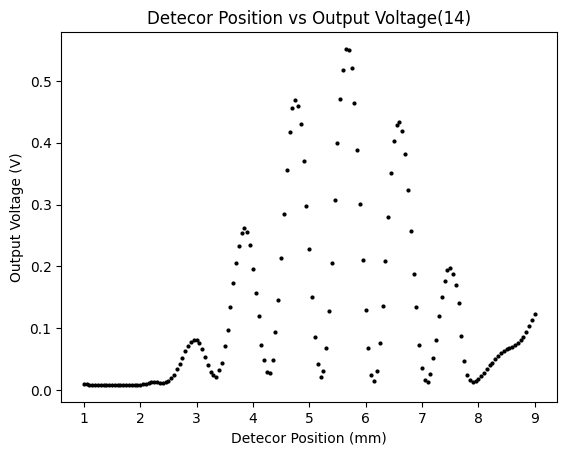

In [2]:
plot_data(14)

In [3]:
from FITTING import *

In [4]:
simulate = simulator()

In [5]:
# n = 200
# center = 5.5e-3 * METER
# detecor_pos = np.linspace(1e-3 * METER, 9e-3 * METER, n)
# result = []
# for pos in detecor_pos:
#   result.append(simulate(center, 14, center, pos))
# result = np.array(result)

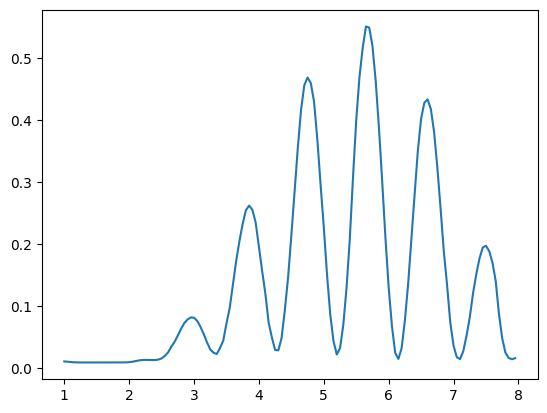

In [82]:
X, Y = get_data(14, trimmed=True)
plt.plot(X, Y)

In [90]:
data = np.array([X, Y]).T
def loss(theta):
  sim = []
  simulate = simulator(theta)
  loss = 0
  for pos, ins in data:
    loss += (simulate(pos * 1e-3 * METER) * theta[9] - ins) ** 2
  return loss
theta0 = np.array([
  double_left_width,
  double_right_width,
  detector_width,
  blocker_width,
  # blocker_points,
  distance1,
  distance2,
  WAVENUMBER,
  # gamma,
  slit_position, 
  # slit_type, 
  blocker_position,
  1e30,
])

loss(theta=theta0)

5.177043074397983

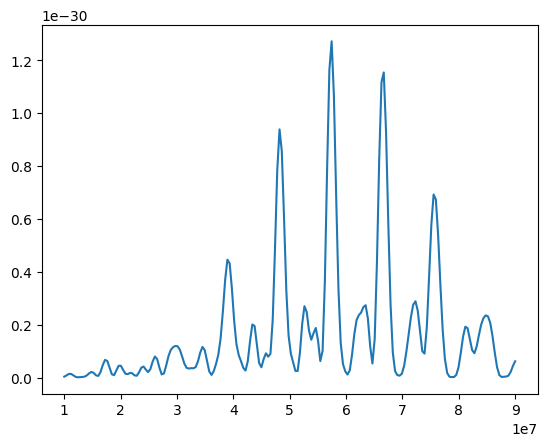

In [97]:
simulate = simulator(theta0)
x = np.linspace(1e-3 * METER, 9e-3 * METER, n)
y = []
for pos in x: y.append(simulate(pos))
y = np.array(y)
plt.plot(x, y)

5.177043074397983


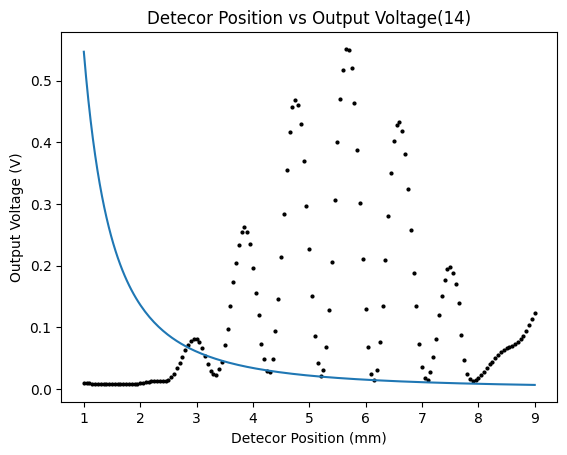

KeyboardInterrupt: 

In [96]:
alpha = 0.1
l = 1
theta = theta0
while l > 1e-4:
  vec = np.identity(len(theta))
  vec = vec * theta * alpha
  theta_prime = theta + vec
  loss_list = []
  l0 = loss(theta)
  for th in theta_prime:
    loss_list.append(loss(th))
  loss_list = np.array(loss_list) - l0
  # print(loss_list * theta)
  loss_list = loss_list * np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
  theta = theta - loss_list * theta * 0.01
  l = loss(theta)
  clear_output()
  print(l)
  plot_data(14)
  simulate = simulator(theta)
  x = np.linspace(1e-3 * METER, 9e-3 * METER, n)
  y = []
  for pos in x: y.append(simulate(pos *  1e-3 * METER))
  plt.plot(x * 1e3 / METER, np.array(y) * 1e40)
  plt.show()

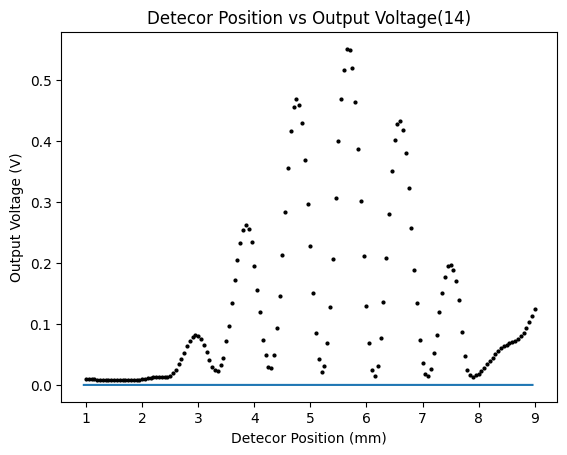

In [ ]:
result = np.array(result)
plt.plot(detecor_pos/METER * 1e3 - 0.04, result * 1e26 / 6.3)
plot_data(14)

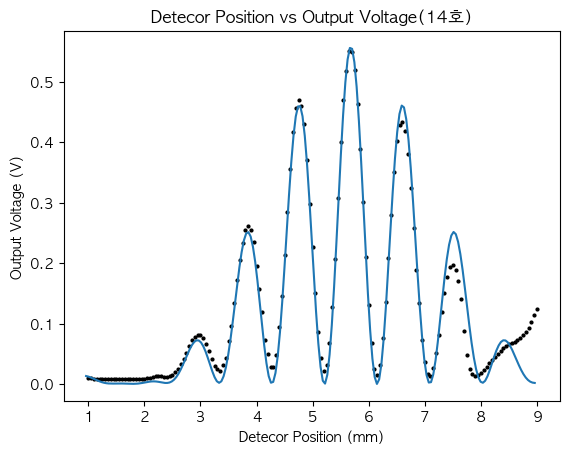

In [29]:
result = np.array(result)
plt.plot(detecor_pos/METER * 1e3 - 0.04, result * 1e26 / 6.3)
plot_data(14)

In [4]:

simulator(theta0)

<function LASER.simulator.<locals>.simulate(slit_position, slit_type, blocker_position, detector_position, wavenumber=0.0009377888518178487)>

In [ ]:
import torch.nn

